Name: Peishan Huang Github Username: peishanhuang USC ID: 7777529178

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, train_test_split
from xgboost import XGBRegressor

Question1(a)Download the Accute Inflamations data.

In [2]:
df=pd.read_csv('../data/diagnosis.csv',encoding='utf-16',sep='\t',header=None,names=['Temperature','Occurrence of nausea',
                                                                                    'Lumbar pain','Urine pushing','Micturition pains',
                                                                                    'Burning of urethra','Inflammation decision',
                                                                                    'Nephritis decision'])
df

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation decision,Nephritis decision
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


Question1(b) Build a decision tree on the whole data set and plot it.

In [3]:
# convert multilabel to one label
label=[]
for i in range(120):
    if df['Inflammation decision'].loc[i]==df['Nephritis decision'].loc[i]=='no':
        label.append(0)
    elif df['Inflammation decision'].loc[i]==df['Nephritis decision'].loc[i]=='yes':
        label.append(1)
    else:
        if df['Inflammation decision'].loc[i]=='no' and df['Nephritis decision'].loc[i]=='yes':
            label.append(2)
        else:
            label.append(3)
df['label']=label
df=df.drop(['Inflammation decision','Nephritis decision'],axis=1)
df


,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,label
0,35.5,no,yes,no,no,no,0
1,35.9,no,no,yes,yes,yes,3
2,35.9,no,yes,no,no,no,0
3,36.0,no,no,yes,yes,yes,3
4,36.0,no,yes,no,no,no,0
...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,2
116,41.5,no,no,no,no,no,0
117,41.5,yes,yes,no,yes,no,2
118,41.5,no,yes,yes,no,yes,2


[Text(620.0, 978.48, 'Temperature <= 37.95\nentropy = 1.954\nsamples = 120\nvalue = [30, 19, 31, 40]'),
 Text(310.0, 761.0400000000001, 'Urine pushing_yes <= 0.5\nentropy = 0.918\nsamples = 60\nvalue = [20, 0, 0, 40]'),
 Text(155.0, 543.6, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(465.0, 543.6, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 0, 40]'),
 Text(930.0, 761.0400000000001, 'Lumbar pain_yes <= 0.5\nentropy = 1.448\nsamples = 60\nvalue = [10, 19, 31, 0]'),
 Text(775.0, 543.6, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(1085.0, 543.6, 'Micturition pains_no <= 0.5\nentropy = 0.958\nsamples = 50\nvalue = [0, 19, 31, 0]'),
 Text(930.0, 326.1600000000001, 'Urine pushing_yes <= 0.5\nentropy = 0.929\nsamples = 29\nvalue = [0, 19, 10, 0]'),
 Text(775.0, 108.72000000000003, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]'),
 Text(1085.0, 108.72000000000003, 'entropy = 0.0\nsamples = 19\nvalue = [0, 19, 0, 0]'),
 Text(1240.0, 326.1600000000001, 'entro

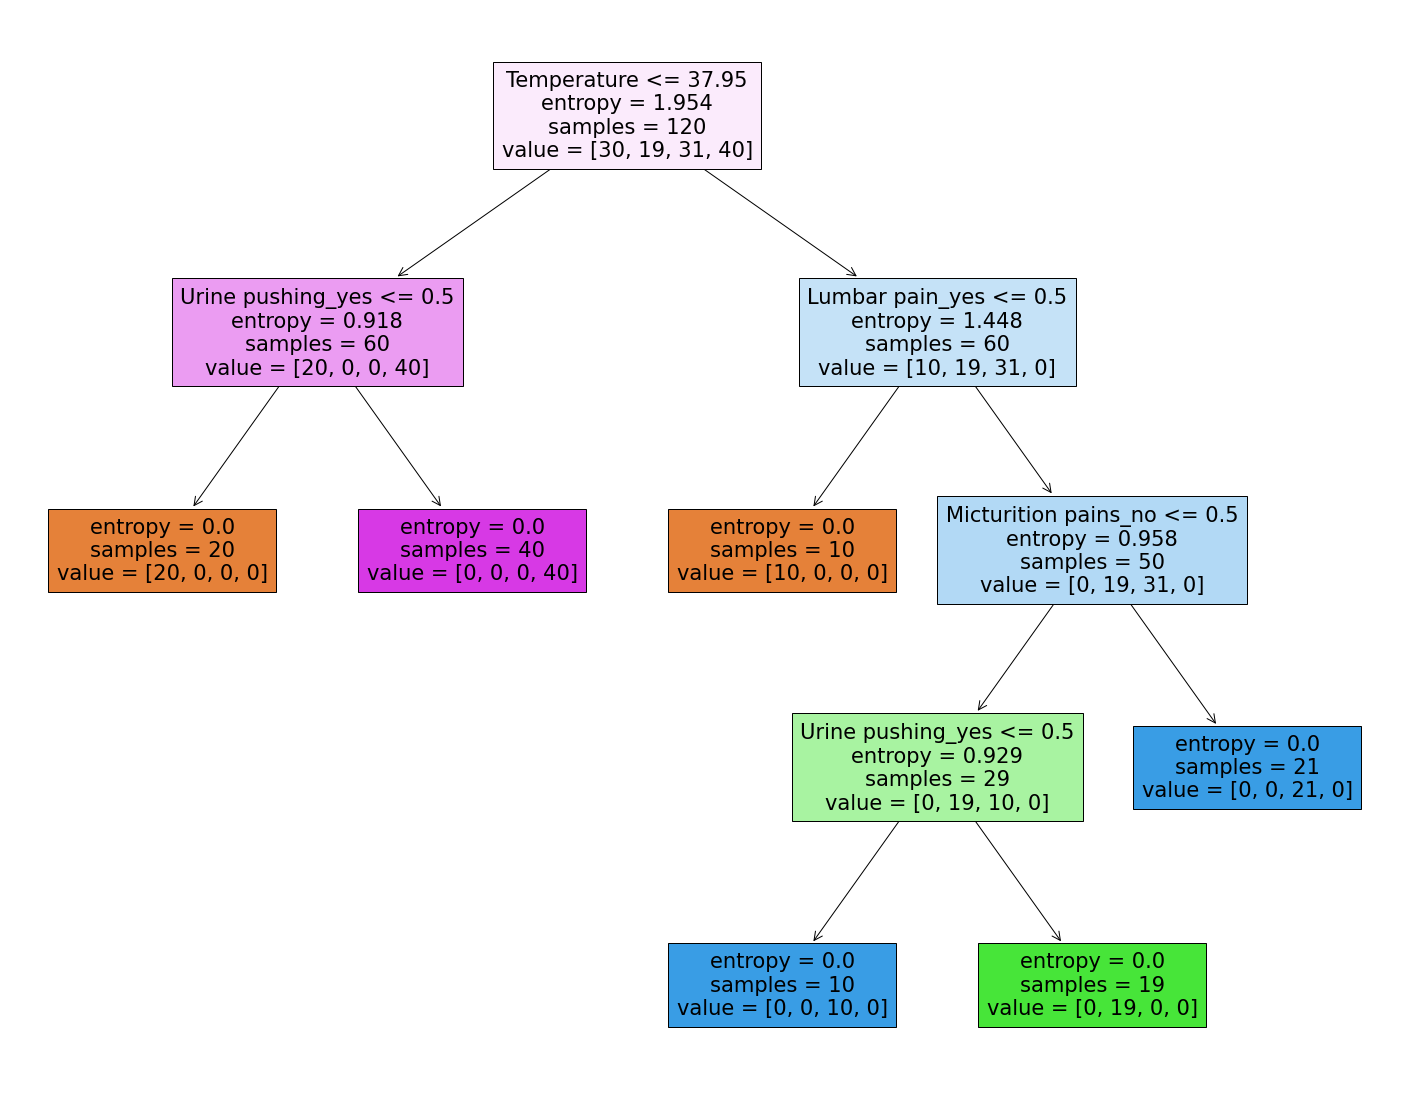

In [8]:
#convert categorical variables to dummy variable
X_train=df.iloc[:,:-1]
y_train=df.iloc[:,-1]

x_dummy=pd.get_dummies(X_train)
model=DecisionTreeClassifier(criterion='entropy').fit(x_dummy,y_train)

#plot tree
fig=plt.figure(figsize=(25,20))  # control the size of the figure
tree.plot_tree(model,feature_names=x_dummy.columns,filled=True)

(c) Convert the decision rules into a set of IF-THEN rules.

In [9]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_

    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [10]:
tree_to_code(model, list(x_dummy.columns))

def tree(Temperature, Occurrence of nausea_no, Occurrence of nausea_yes, Lumbar pain_no, Lumbar pain_yes, Urine pushing_no, Urine pushing_yes, Micturition pains_no, Micturition pains_yes, Burning of urethra_no, Burning of urethra_yes):
  if Temperature <= 37.95000076293945:
    if Urine pushing_yes <= 0.5:
      return [[20.  0.  0.  0.]]
    else:  # if Urine pushing_yes > 0.5
      return [[ 0.  0.  0. 40.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar pain_yes <= 0.5:
      return [[10.  0.  0.  0.]]
    else:  # if Lumbar pain_yes > 0.5
      if Micturition pains_no <= 0.5:
        if Urine pushing_yes <= 0.5:
          return [[ 0.  0. 10.  0.]]
        else:  # if Urine pushing_yes > 0.5
          return [[ 0. 19.  0.  0.]]
      else:  # if Micturition pains_no > 0.5
        return [[ 0.  0. 21.  0.]]


(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [23]:
#convert categorical variables to dummy variable
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
#train & test split
x_dummy=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(x_dummy,y,test_size=0.2)

model=DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
train_accuracy_score=accuracy_score(y_train,y_train_pred)
test_accuracy_score=accuracy_score(y_test,y_test_pred)
print(f'The training score is {train_accuracy_score}, the testing score is {test_accuracy_score}.')

The training score is 1.0, the testing score is 1.0.


In [24]:
#pruning a tree
path=model.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.        , 0.19243739, 0.35420679, 0.42480084, 0.76739697])

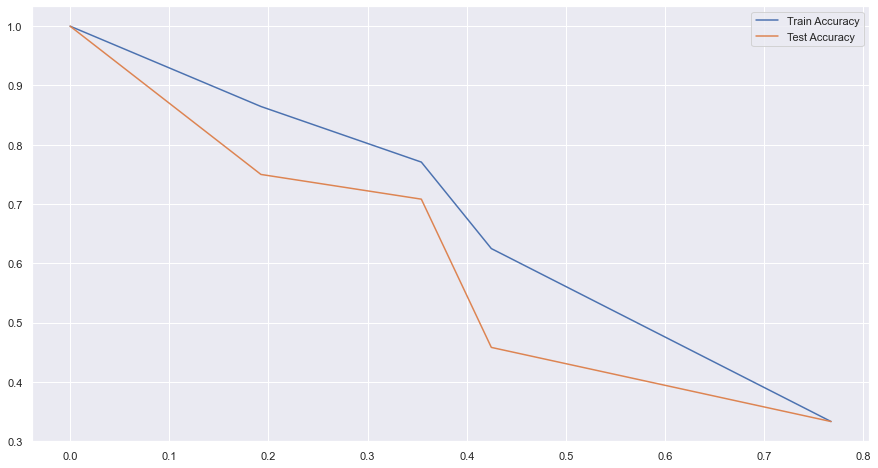

The best test accuracy score is 1.0, where the alphas is set to be 0.


In [33]:
accuracy_train_score,accuracy_test_score=[],[]
for i in alphas:
    model=DecisionTreeClassifier(criterion='entropy',ccp_alpha=i).fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    train_accuracy_score=accuracy_score(y_train,y_train_pred)
    test_accuracy_score=accuracy_score(y_test,y_test_pred)
    accuracy_train_score.append(train_accuracy_score)
    accuracy_test_score.append(test_accuracy_score)

sns.set()
plt.figure(figsize=(15,8))
sns.lineplot(y=accuracy_train_score,x=alphas,label='Train Accuracy')
sns.lineplot(y=accuracy_test_score,x=alphas,label='Test Accuracy')
plt.show()

print('The best test accuracy score is 1.0, where the alphas is set to be 0.')

Question2(a)Use the first 1495 rows of data as the training set and the rest as the test set.

In [2]:
df=pd.read_csv('../data/communities.csv',header=None,na_values='?') #change'?' to NaN
df.drop([0,1,2,3,4], axis=1,inplace=True)
df.columns=['population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29',
            'agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec',
            'pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap',
            'OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore',
            'PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr',
            'FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids',
            'PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig',
            'PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup',
            'PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR',
            'MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone',
            'PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc',
            'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85',
            'PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq',
            'LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian',
            'PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg',
            'LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']
trainset=df.iloc[:1495]
testset=df.iloc[1495:].reset_index(drop=True) 
trainset.mean()

population             0.058167
householdsize          0.461732
racepctblack           0.179839
racePctWhite           0.752829
racePctAsian           0.153712
                         ...   
LemasPctPolicOnPatr    0.713054
LemasGangUnitDeploy    0.451883
LemasPctOfficDrugUn    0.093304
PolicBudgPerPop        0.190753
ViolentCrimesPerPop    0.240609
Length: 123, dtype: float64

Question2(b)The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [3]:
#impute NaN in trainset with the columns mean
df=df.fillna(trainset.mean())
df.isnull().values.any()
trainset=df.iloc[:1495]
testset=df.iloc[1495:].reset_index(drop=True) 
trainset

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03


Question2(c)Plot a correlation matrix for the features in the data set.

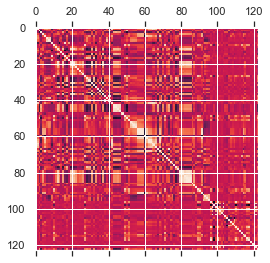

In [40]:
plt.matshow(df.corr())
plt.show()

(d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m , in
which s is sample standard deviation and m is sample mean.

In [42]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) 
all_cv=df.apply(cv)
all_cv

population             2.203503
householdsize          0.353298
racepctblack           1.410920
racePctWhite           0.323782
racePctAsian           1.359162
                         ...   
LemasPctPolicOnPatr    0.120471
LemasGangUnitDeploy    0.360299
LemasPctOfficDrugUn    2.555266
PolicBudgPerPop        0.343782
ViolentCrimesPerPop    0.979015
Length: 123, dtype: float64

(e)Pick 128^(1/2) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [43]:
all_cv=all_cv.sort_values(ascending=False)
features=all_cv.head(int(math.sqrt(128)))
to_df=pd.DataFrame({'features':features.index,'CV':features.values})
to_df

,features,CV
0,NumStreet,4.407702
1,NumInShelters,3.485481
2,NumIlleg,2.994196
3,NumImmig,2.900497
4,LemasPctOfficDrugUn,2.555266
5,NumUnderPov,2.304970
6,population,2.203503
7,numbUrban,2.001744
8,HousVacant,1.958780
9,LandArea,1.678031


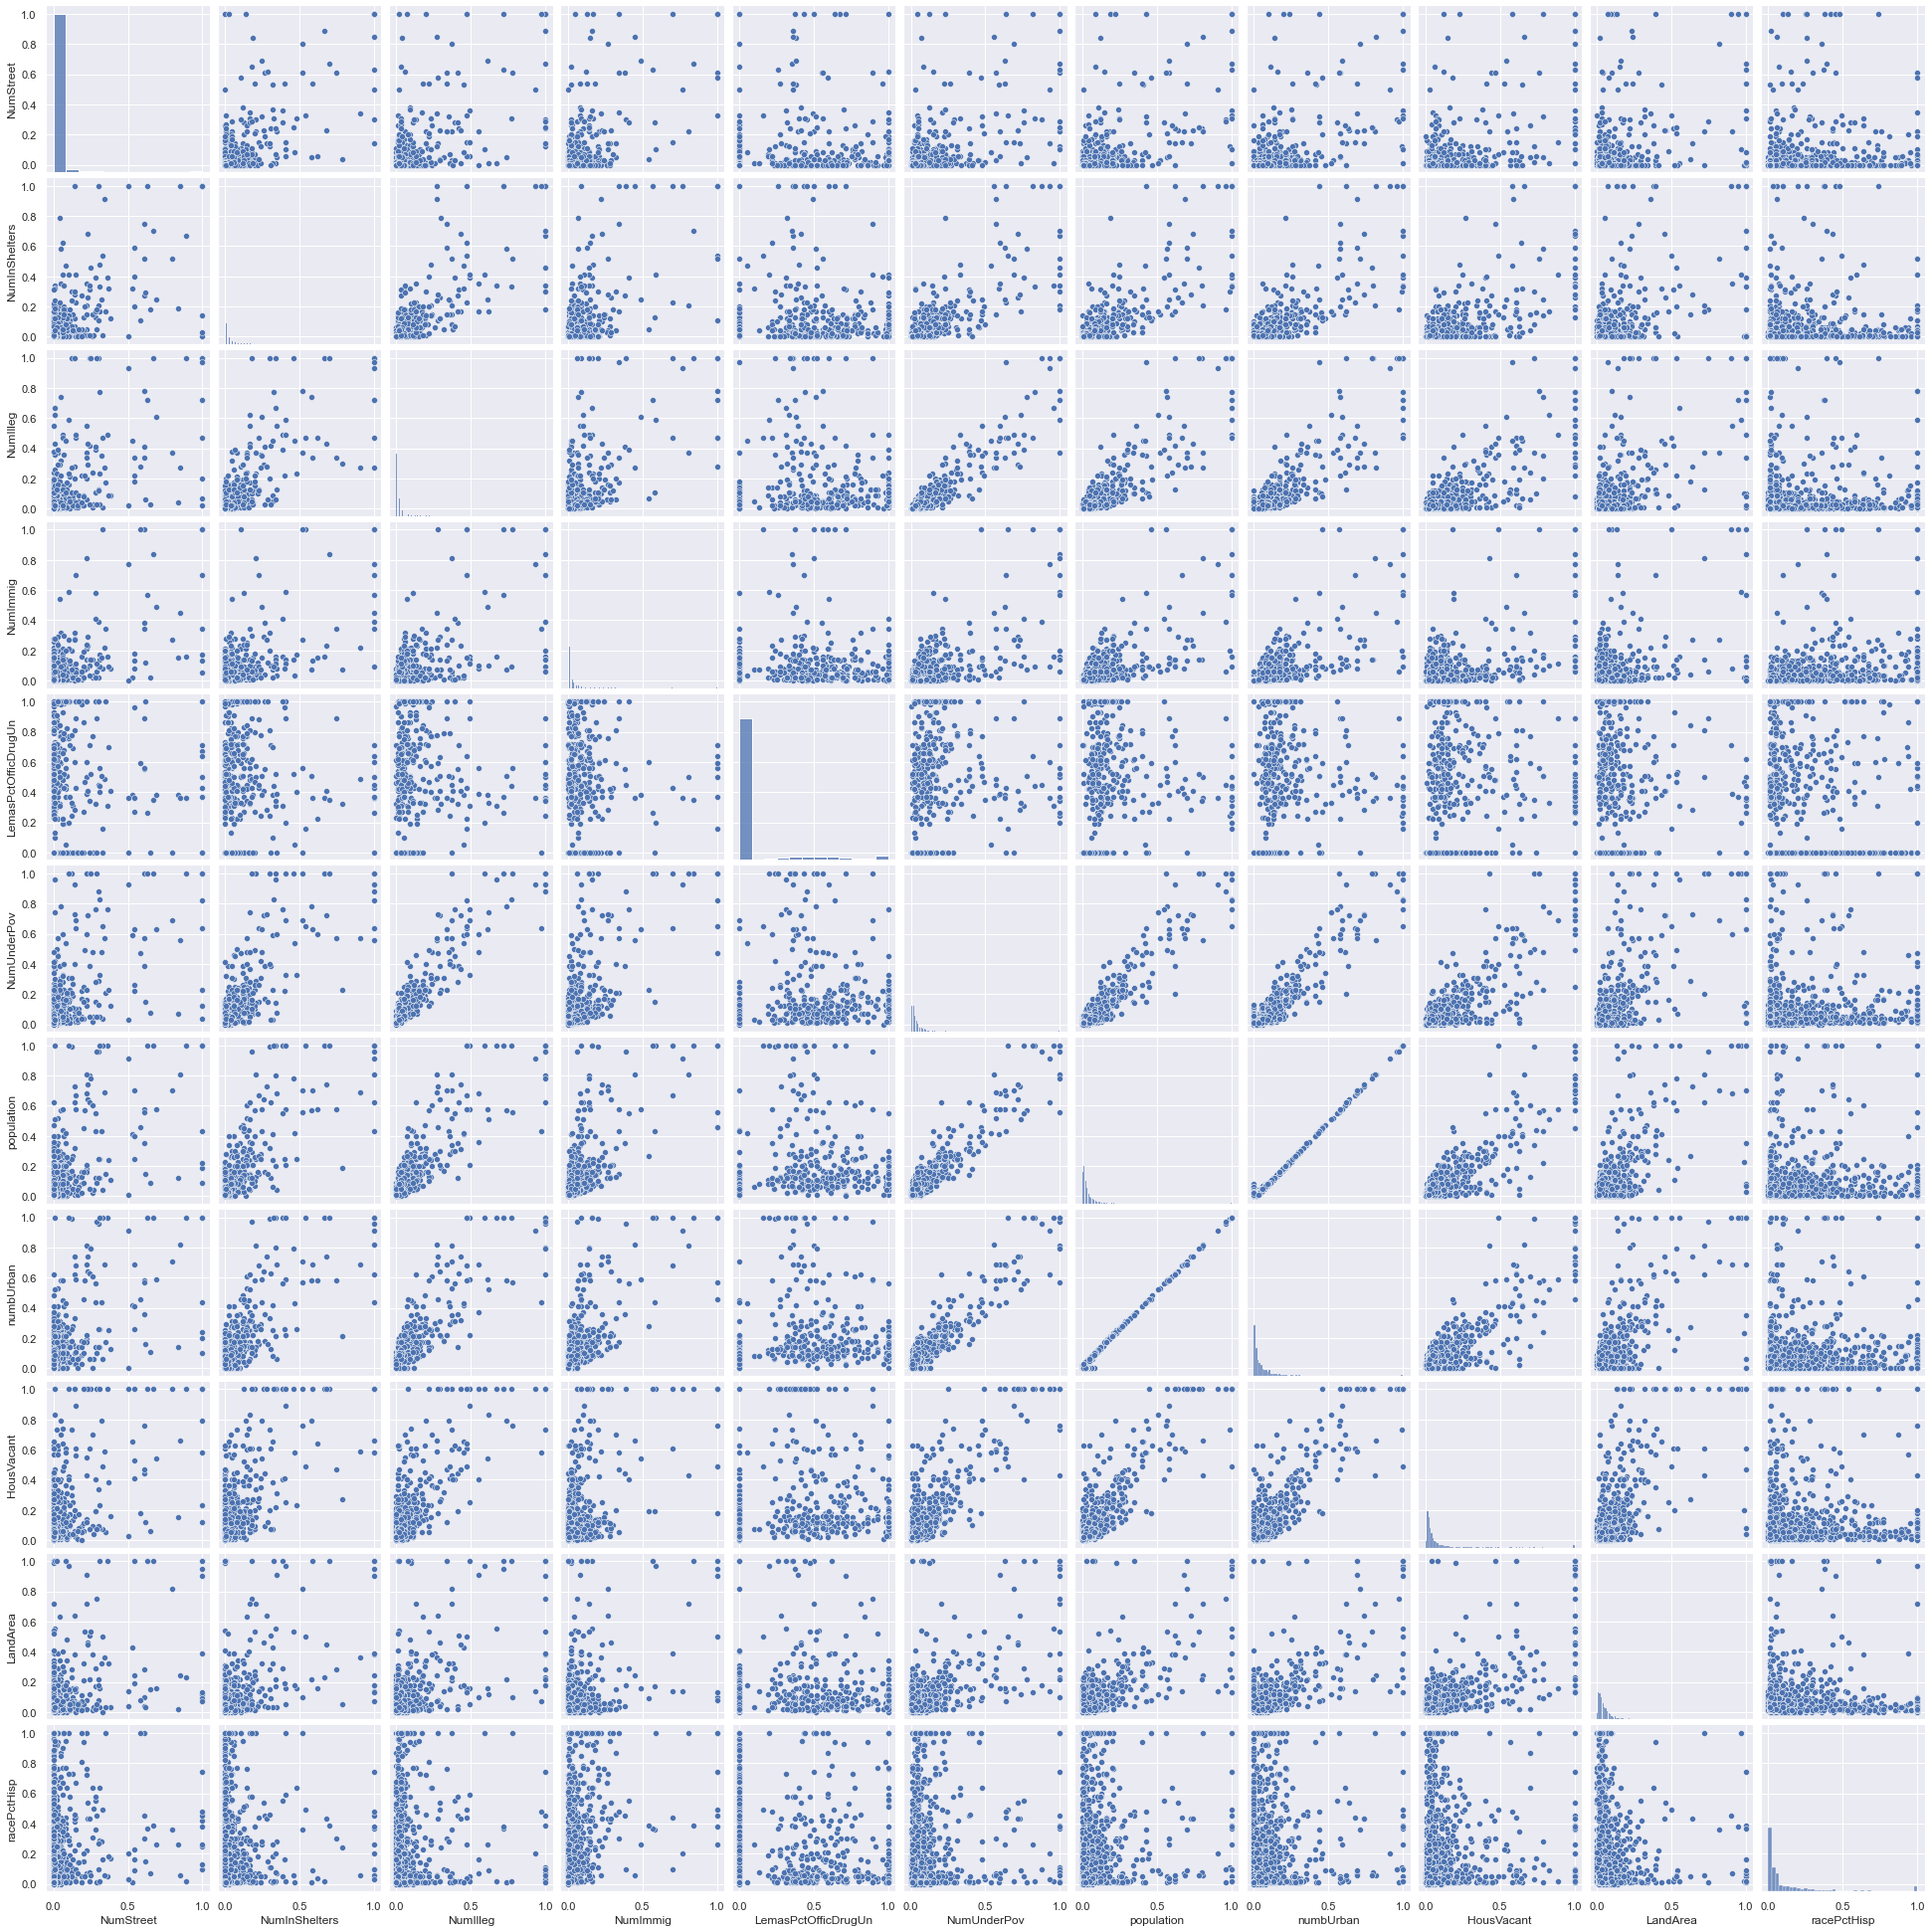

In [44]:
#scatter plots
name=to_df['features'].tolist()
feature_df=pd.DataFrame()
for i in name:
    feature_df[i]=df[i].values
feature_df
sns.pairplot(feature_df)

From the above scatter plot, we can see feature population has a  linear relationship with both NumUnderPov and numbUrban, whereas the relationship among other variables are not clear to see.

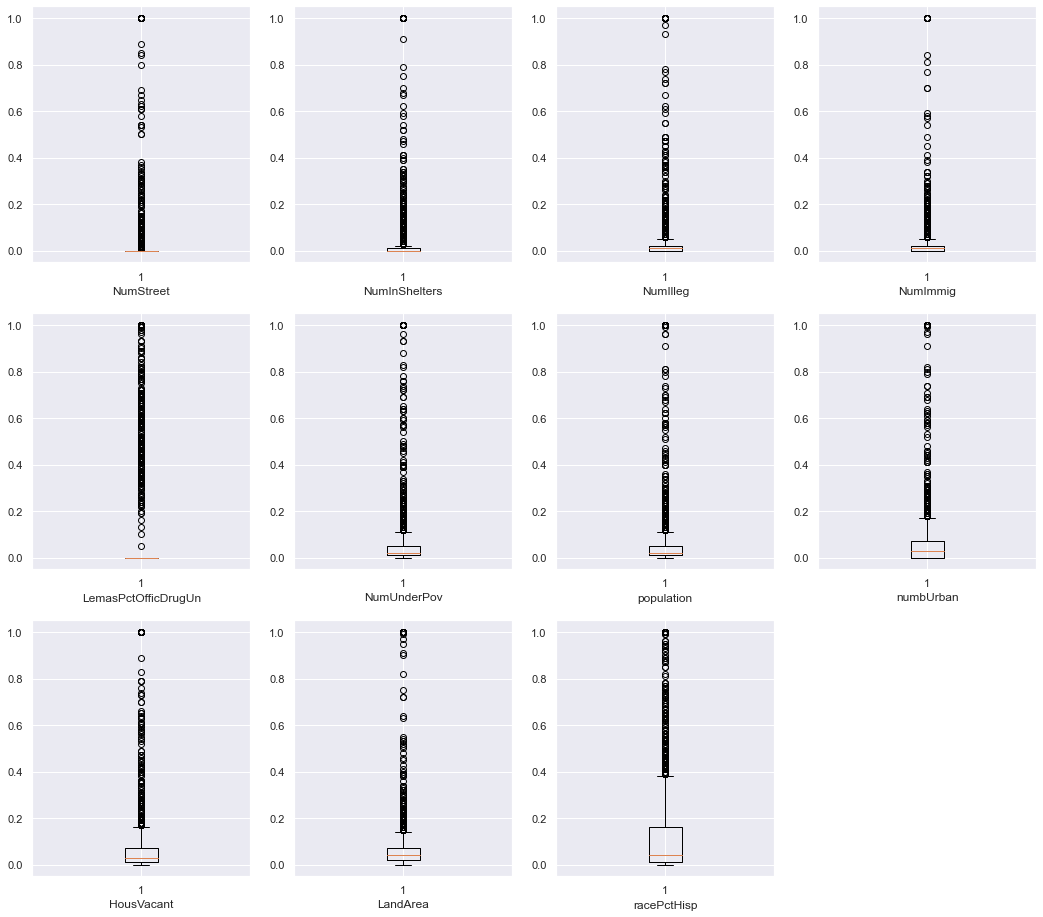

In [45]:
# boxplots
name=to_df['features'].tolist()
feature_df=pd.DataFrame()
k=1
plt.subplots(figsize =(18,16))
for i in name:
    feature_df[i]=df[i].values
    plt.subplot(3,4,k)  #(row,column,position)
    plt.boxplot(feature_df[i])
    plt.xlabel(i)
    k=k+1
plt.show()

(f) Fit a linear model using least squares to the training set and report the test error.

In [46]:
trainset=df.iloc[:1495]
testset=df.iloc[1495:].reset_index(drop=True)

X_train=trainset.iloc[:,:-1].values
y_train=trainset.iloc[:,-1].values
X_test=testset.iloc[:,:-1].values
y_test=testset.iloc[:,-1].values

model=LinearRegression().fit(X_train,y_train)
y_predict=model.predict(X_test)
MSE=mean_squared_error(y_test,y_predict)
print(f'The MSE of linear regression is {MSE}')

The MSE of linear regression is 0.018141971135530115


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [47]:
trainset=df.iloc[:1495]
testset=df.iloc[1495:].reset_index(drop=True)

X_train=trainset.iloc[:,:-1].values
y_train=trainset.iloc[:,-1].values
X_test=testset.iloc[:,:-1].values
y_test=testset.iloc[:,-1].values

model=RidgeCV(alphas=[1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4],cv=5).fit(X_train,y_train)
model.alpha_
model.set_params(alphas=model.alpha_)
y_predict=model.predict(X_test)
MSE=mean_squared_error(y_test,y_predict)
score=model.score(X_test,y_test)
#print(model.get_params)
print(f'The λ chosen by cross-validation is {model.alpha_}.')
print(f'The MSE test error is {MSE}.')
print(f'The score of the ridge prediction is {score}.')

The λ chosen by cross-validation is 1.0.
The MSE test error is 0.01773247499289665.
The score of the ridge prediction is 0.6271188537091102.


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [48]:
#lasso model with nomalized features
trainset=df.iloc[:1495]
testset=df.iloc[1495:].reset_index(drop=True)

X_train=trainset.iloc[:,:-1].values
y_train=trainset.iloc[:,-1].values
X_test=testset.iloc[:,:-1].values
y_test=testset.iloc[:,-1].values

model=LassoCV(alphas=[1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4]).fit(X_train,y_train)
model.alpha_
model.set_params(alphas=model.alpha_)
y_predict=model.predict(X_test)
MSE=mean_squared_error(y_test,y_predict)
score=model.score(X_test,y_test)
variables=model.coef_
print(f'The λ chosen by cross-validation is {model.alpha_}.')
print(f'The MSE test error is {MSE}.')
print(f'The score of the lasso prediction is {score}.')
print(f'The variables selected by the lasso model is: \n{variables} ')

The λ chosen by cross-validation is 0.0001.
The MSE test error is 0.017786089519102124.
The score of the lasso prediction is 0.6259914394030222.
The variables selected by the lasso model is: 
[-0.          0.          0.27305204 -0.         -0.01798214  0.
  0.07600145 -0.29112509  0.          0.00387318 -0.          0.04099461
  0.         -0.09316409  0.02905821 -0.11005721  0.0592378   0.04182285
 -0.10979718  0.         -0.         -0.06946044 -0.02254008 -0.03194572
  0.02923882  0.02361888  0.02570896 -0.         -0.15012476 -0.02130049
  0.          0.01731481 -0.          0.1550098  -0.01919701  0.
  0.01649189  0.          0.13263026  0.15069238 -0.0955719  -0.
  0.         -0.         -0.19812839 -0.03596962 -0.01153443  0.
 -0.13465667 -0.06233463  0.09557897 -0.08115944 -0.         -0.
 -0.         -0.00562052 -0.          0.          0.          0.03926042
 -0.         -0.08081295 -0.         -0.08945576  0.07330746 -0.
 -0.         -0.06435704  0.23109236  0.06485728  0.0

In [49]:
X_train=trainset.iloc[:,:-1]
names=X_train.columns.values
variables=model.coef_
name_coef=pd.DataFrame(np.column_stack((names,variables)))
selected_vars=name_coef.loc[name_coef[1] != 0]  # filter rows
selected_vars

,0,1
2,racepctblack,0.273052
4,racePctAsian,-0.017982
6,agePct12t21,0.076001
7,agePct12t29,-0.291125
9,agePct65up,0.003873
...,...,...
115,PctUsePubTrans,-0.047532
116,PolicCars,0.000543
118,LemasPctPolicOnPatr,0.021727
119,LemasGangUnitDeploy,0.04069


In [50]:
#lasso model with standardized features
trainset=df.iloc[:1495]
testset=df.iloc[1495:].reset_index(drop=True)

X_train=trainset.iloc[:,:-1].values
y_train=trainset.iloc[:,-1].values
X_test=testset.iloc[:,:-1].values
y_test=testset.iloc[:,-1].values

scaler=StandardScaler()
scaled_Xtrain=scaler.fit_transform(X_train)
scaled_Xtest=scaler.transform(X_test)
model=LassoCV(alphas=[1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4],max_iter=3000).fit(scaled_Xtrain,y_train)
model.alpha_
model.set_params(alphas=model.alpha_)
y_predict=model.predict(scaled_Xtest)
MSE=mean_squared_error(y_test,y_predict)
score=model.score(scaled_Xtest,y_test)
variables=model.coef_
print(f'The λ chosen by cross-validation is {model.alpha_}.')
print(f'The MSE test error is {MSE}.')
print(f'The score of the lasso prediction is {score}.')
print(f'The variables selected by the lasso model is: \n{variables} ')

The λ chosen by cross-validation is 0.001.
The MSE test error is 0.017758149260213713.
The score of the lasso prediction is 0.6265789713615417.
The variables selected by the lasso model is: 
[-0.00000000e+00  0.00000000e+00  6.68051283e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  5.26467733e-03 -2.85717109e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.56601172e-02
  0.00000000e+00 -8.79325925e-03  2.91177503e-03 -1.81093057e-02
  6.82362963e-03  3.51449935e-03 -1.56813674e-02  0.00000000e+00
 -0.00000000e+00 -4.08897864e-03 -3.12694612e-03 -4.99334922e-03
  4.85727411e-03  3.44515574e-03  3.11627664e-03 -0.00000000e+00
 -2.09841083e-02 -1.74714543e-04  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.43499343e-02 -1.94041052e-04  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.50613573e-02  1.50872492e-02
 -2.42927456e-03 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -3.96442326e-02 -8.81759216e-03 -5.69203647e-04 -0.00000000e+00
 -1.92239405e-02 -1.55718889e

In [51]:
X_train=trainset.iloc[:,:-1]
names=X_train.columns.values
variables=model.coef_
name_coef=pd.DataFrame(np.column_stack((names,variables)))
selected_vars=name_coef.loc[name_coef[1] != 0]   # use .loc to choose a group of rows
selected_vars

,0,1
2,racepctblack,0.066805
6,agePct12t21,0.005265
7,agePct12t29,-0.028572
11,pctUrban,0.01566
13,pctWWage,-0.008793
...,...,...
114,PopDens,0.00254
115,PctUsePubTrans,-0.007038
116,PolicCars,0.002432
118,LemasPctPolicOnPatr,0.002066


# compares nomalized features lasso & standardized features lasso
The λ chosen by cross-validation is 0.0001 for the nomalized features lasso, which is smaller than the λ chosen by standardized features lasso(0.001); The MSE test error is 0.017786089519102124, which is slightly higher than the MSE of the standardized features lasso(0.017758149260213713). Hence the lasso model with standardized features is better.




(i) Fit a PCR model on the training set, with M (the number of principal compo- nents) chosen by cross-validation. Report the test error obtained.

In [52]:
# select the Component M that gives the lowest average cross-validation error
trainset=df.iloc[:1495]
testset=df.iloc[1495:].reset_index(drop=True)

X_train=trainset.iloc[:,:-1].values
y_train=trainset.iloc[:,-1].values
X_test=testset.iloc[:,:-1].values
y_test=testset.iloc[:,-1].values

scaler=StandardScaler()
scaled_Xtrain=scaler.fit_transform(X_train)
scaled_Xtest=scaler.transform(X_test)

average_cross_val=[]
for m in range(1,123):
    pcr=PCA(n_components=m)
    x_train_pca=pcr.fit_transform(scaled_Xtrain)
    kfold=KFold(n_splits=5)
    MSE=[]
    for train_index, test_index in kfold.split(x_train_pca):   # repeat this loop for n_splits=5 times
        x_tr, x_te=x_train_pca[train_index.tolist()], x_train_pca[test_index.tolist()]
        y_tr, y_te=y_train[train_index.tolist()], y_train[test_index.tolist()]
        model=LinearRegression().fit(x_tr,y_tr)
        y_predict=model.predict(x_te)
        mse=mean_squared_error(y_te,y_predict)
        MSE.append(mse)
    average_cross_val.append(np.mean(MSE))
average_cross_val

[0.033134545282809263,
 0.029392605634912326,
 0.028345048357736807,
 0.028360486373778544,
 0.02618796369548178,
 0.026279123581842624,
 0.025838335845045572,
 0.021923630928446063,
 0.021113763073109578,
 0.02103534028146429,
 0.02103831874955171,
 0.021074383426430757,
 0.020783247242807952,
 0.020782039859326615,
 0.0207532665107937,
 0.020747782606897202,
 0.020627066425379405,
 0.02035111197389624,
 0.020433855921402438,
 0.020431278908513928,
 0.02045246354054993,
 0.02039891047888477,
 0.020394030127177304,
 0.02044698434864392,
 0.020455893600034292,
 0.020450070640655255,
 0.020236729272659435,
 0.020203266313115,
 0.020142090958928122,
 0.02006138042472095,
 0.019981994442499578,
 0.020061580162011542,
 0.02005754937215478,
 0.02008734780935556,
 0.020144508203362863,
 0.020115462782525316,
 0.020084216904606433,
 0.020057742673273638,
 0.02005808561542357,
 0.019993099423448554,
 0.020039707766461946,
 0.019988161038074454,
 0.019982102070071377,
 0.019847791056299434,
 0.0

In [53]:
to_df=pd.DataFrame({'number of components': range(1,123), 'average_cross_val':average_cross_val})
print(to_df)
print(to_df[to_df['average_cross_val']==to_df['average_cross_val'].min()])  # select row with minimum

     number of components  average_cross_val
0                       1           0.033135
1                       2           0.029393
2                       3           0.028345
3                       4           0.028360
4                       5           0.026188
..                    ...                ...
117                   118           0.020494
118                   119           0.020480
119                   120           0.020527
120                   121           0.020549
121                   122           0.020576

[122 rows x 2 columns]
    number of components  average_cross_val
94                    95           0.019451


In [54]:
# model Assessment on M=95
trainset=df.iloc[:1495]
testset=df.iloc[1495:].reset_index(drop=True)

X_train=trainset.iloc[:,:-1].values
y_train=trainset.iloc[:,-1].values
X_test=testset.iloc[:,:-1].values
y_test=testset.iloc[:,-1].values

scaler=StandardScaler()
scaled_Xtrain=scaler.fit_transform(X_train)
scaled_Xtest=scaler.transform(X_test)

pcr=PCA(n_components=95)
x_train_pca=pcr.fit_transform(scaled_Xtrain)
model=LinearRegression().fit(x_train_pca,y_train)
x_test_pca=pcr.transform(scaled_Xtest)
y_predict=model.predict(x_test_pca)
MSE=mean_squared_error(y_test,y_predict)
print(f'The MSE test error of PCA with 95 components is {MSE}.')

The MSE test error of PCA with 95 components is 0.018388171009245505.


(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.

In [9]:
#select the α that gives the lowest cross-validation error
trainset=df.iloc[:1495]
testset=df.iloc[1495:].reset_index(drop=True)

X_train=trainset.iloc[:,:-1].values
y_train=trainset.iloc[:,-1].values
X_test=testset.iloc[:,:-1].values
y_test=testset.iloc[:,-1].values

alphas=[1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4]

MSE=[]
k=1
tmpi = 1
for i in alphas:
    kfold=KFold(n_splits=5)
    average_cross_val=[]
    for train_index, test_index in kfold.split(X_train):
        x_tr, x_te=X_train[train_index], X_train[test_index]
        y_tr, y_te=y_train[train_index], y_train[test_index]
        model=XGBRegressor(reg_alpha=i).fit(x_tr,y_tr)
        y_pred=model.predict(x_te)
        mse=mean_squared_error(y_te,y_pred)
        average_cross_val.append(mse)
    MSE.append(np.mean(average_cross_val))
    if np.mean(average_cross_val)<k:
        k=np.mean(average_cross_val)
        tmpi = i

print(MSE)

print(f'The lowest MSE is {k} with the alphas equal to {tmpi}. ')  

 

[0.023437019304178706, 0.02318562242773151, 0.02253688887840428, 0.02272069169842577, 0.021772200366401956, 0.022048791936980172, 0.037433587590192496, 0.12374709030100335, 0.12374709030100335]
The lowest MSE is 0.021772200366401956 with the alphas equal to 1.0. 


In [11]:
# choose the xgboost model with alpha=1.0
model=XGBRegressor(reg_alpha=tmpi).fit(x_tr,y_tr)
#test model on the testset
y_pred=model.predict(X_test)
MSE=mean_squared_error(y_test,y_pred)
print(f'The MSE test error with alpha=1 is {MSE}')

The MSE test error with alpha=1 is 0.018009180720748332


Reference:
1.RidgeCV:https://chrisalbon.com/code/machine_learning/linear_regression/selecting_best_alpha_value_in_ridge_regression/
2.np.column_stack:https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html
3.lassoCV:https://www.datatechnotes.com/2019/07/lasso-regression-example-in-python.html
4.standardized:https://medium.com/analytics-vidhya/why-it-makes-a-difference-how-to-standardize-training-and-test-set-e95bf350bed3
5.kfold:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
6.get_dummies:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
7.pruning decision tree:https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/